In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

100%|██████████| 9.94G/9.94G [02:37<00:00, 67.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3


In [23]:
#Importing necessary laibraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [24]:
# To ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available")
else:
    print(" GPU is not avaliable")

GPU is available


In [25]:
# Load and explore the dataset
train_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train"
test_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test"
val_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val"

In [26]:
#list  all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)
print("Number of classes:", num_classes)
print("Classes:", classes)

Number of classes: 2
Classes: ['nofire', 'fire']


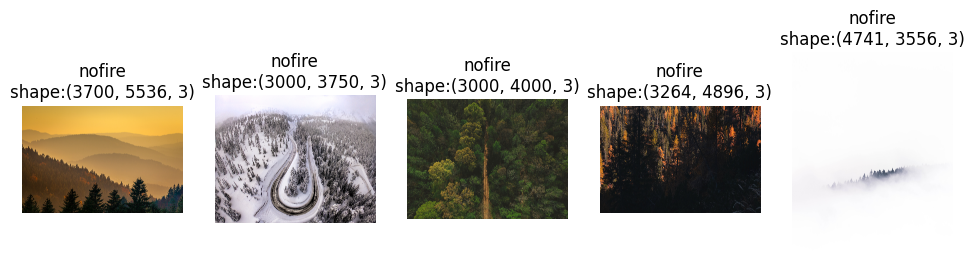

In [27]:
#Lets visualizze the image in the dataset
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]}\nshape:{img.shape}')
  plt.axis('off')
plt.show()

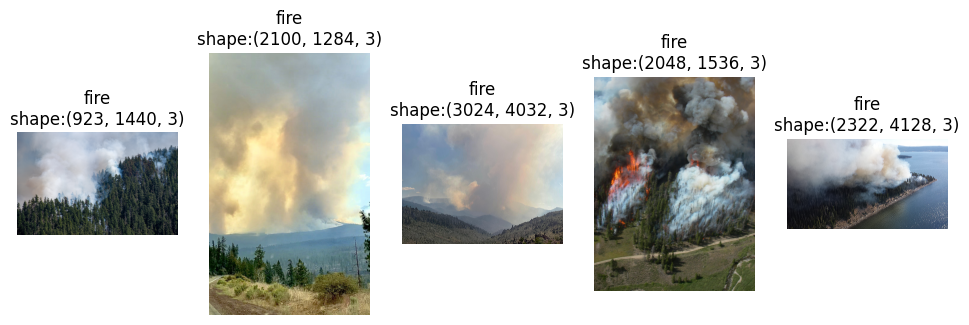

In [28]:
#Lets visualizze the image in the dataset
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[1])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)
  plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]}\nshape:{img.shape}')
  plt.axis('off')
plt.show()

In [29]:
#Preprocessing
# Image dimenssions and batch size
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator

img_width, img_height = 150, 150
batch_size = 32

#Data genrator
train_datagen = ImageDataGenerator( rescale=1./255)
val_datagen = ImageDataGenerator( rescale=1./255)
test_datagen = ImageDataGenerator( rescale=1./255)

# Define the directories for train, validation, and test data
train_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train" # Defining train_dir here
val_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val"   # Defining val_dir here
test_dir="/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test"  # Defining test_dir here


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle = True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [30]:
#Map the indices
class_mapping = train_generator.class_indices
#print(class_indices)
#Extract the class names
class_names = list(class_mapping.keys())
print(class_names)

['fire', 'nofire']


In [31]:
# Lets build the CNN Model
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)

In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#train thr model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
29/58 ━━━━━━━━━━━━━━━━━━━━ 3:06 6s/step - accuracy: 0.5192 - loss: 0.9902

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


49/58 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.5444 - loss: 0.8827 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 476s 8s/step - accuracy: 0.5543 - loss: 0.8491 - val_accuracy: 0.7083 - val_loss: 0.5338
Epoch 2/12
 1/58 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7188 - loss: 0.5429

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7188 - loss: 0.5429 - val_accuracy: 0.6641 - val_loss: 0.5411
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 507s 9s/step - accuracy: 0.7215 - loss: 0.5367 - val_accuracy: 0.7474 - val_loss: 0.4795
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7812 - loss: 0.5255 - val_accuracy: 0.7474 - val_loss: 0.4835
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 504s 8s/step - accuracy: 0.7872 - loss: 0.4692 - val_accuracy: 0.7266 - val_loss: 0.4912
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8750 - loss: 0.4188 - val_accuracy: 0.7396 - val_loss: 0.4729
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 470s 8s/step - accuracy: 0.7761 - loss: 0.4581 - val_accuracy: 0.7812 - val_loss: 0.4375
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7500 - loss: 0.5038 - val_accuracy: 0.7656 - val_loss: 0.4470
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 510s 9s/step - accuracy: 0.7873 - loss: 0.4579 - val_accuracy: 0.7760 - val_loss: 0.4282

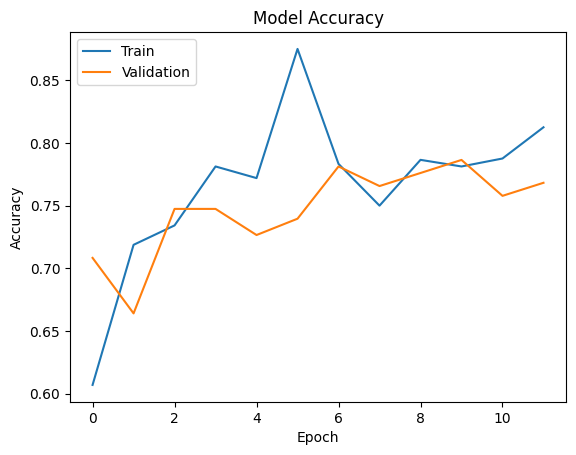

In [34]:
#Evalute the model = plotting traning and validation acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

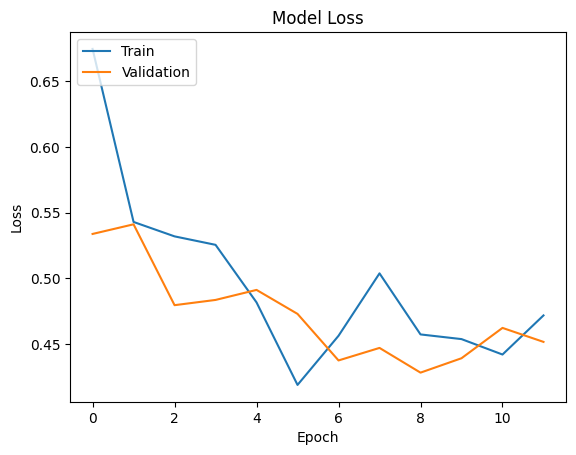

In [35]:
#Evalute the model = plotting traning and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
# Evalute the model using test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test Accuracy:{test_acc:,4f}')

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 2/12 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.8438 - loss: 0.3328 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 9/12 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.8178 - loss: 0.3591

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 90s 7s/step - accuracy: 0.8107 - loss: 0.3747
Test Accuracy:{test_acc:,4f}


In [37]:
#save the model
model.save('FFD.keras')

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#Load the model
model = load_model('FFD.keras')

#predict on new image = create a function
def predict_fire(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        predicted_class = class_names[1]
    else:
        predicted_class = class_names[0]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

In [39]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test')

['nofire', 'fire']

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


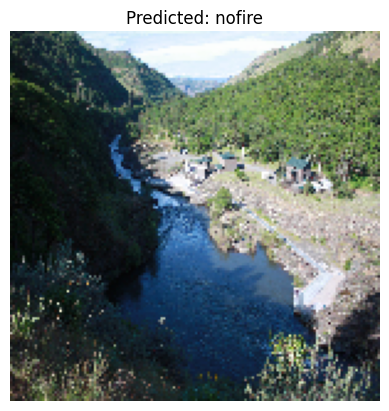

In [40]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/39728540251_888dc24afa_o.jpg')